# EPR Data Loading with eprload()

This notebook demonstrates how to use the `epyr.eprload()` function to load EPR data from Bruker files.

The function automatically detects file formats and loads both 1D and 2D EPR data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Add epyr to path
sys.path.append('../../')

import epyr

# Data directory
data_dir = Path('../data')

print(f"EPyR Tools version: {epyr.__version__}")

2025-09-10 19:48:32,472 - epyr.epyr.plugins - INFO - Registered export plugin: csv
EPyR Tools version: 0.1.5


## Loading 1D EPR Data

Load a single EPR spectrum from BES3T format.

File: 130406SB_CaWO4_Er_CW_5K_20.DSC
Data points: 1024
X-axis range: 100.0 to 6100.0 G
Parameters extracted: 105


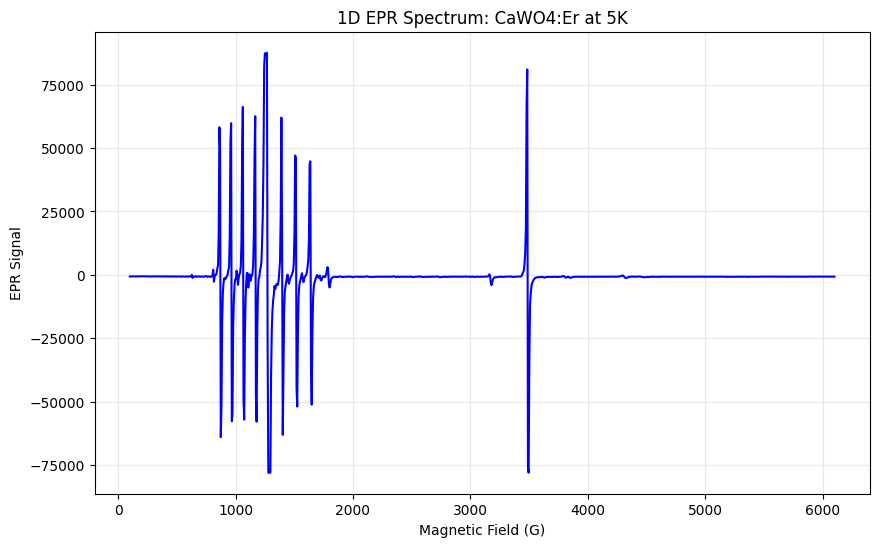

In [2]:
# Load 1D EPR spectrum
file_1d = data_dir / '130406SB_CaWO4_Er_CW_5K_20.DSC'

x_1d, y_1d, params_1d, filepath_1d = epyr.eprload(str(file_1d), plot_if_possible=False)

print(f"File: {file_1d.name}")
print(f"Data points: {len(y_1d)}")
print(f"X-axis range: {x_1d.min():.1f} to {x_1d.max():.1f} G")
print(f"Parameters extracted: {len(params_1d)}")

# Plot 1D spectrum
plt.figure(figsize=(10, 6))
plt.plot(x_1d, y_1d, 'b-', linewidth=1.5)
plt.xlabel('Magnetic Field (G)')
plt.ylabel('EPR Signal')
plt.title('1D EPR Spectrum: CaWO4:Er at 5K')
plt.grid(True, alpha=0.3)
plt.show()

## Loading 2D EPR Data (Angular Dependent)

Load angular-dependent EPR data from ESP format.

In [3]:
# Load 2D angular EPR data
file_2d = data_dir / '2014_03_19_MgO_300K_111_fullrotation33dB.par'

x_2d, y_2d, params_2d, filepath_2d = epyr.eprload(str(file_2d), plot_if_possible=False)

print(f"File: {file_2d.name}")
print(f"Data shape: {y_2d.shape}")
print(f"Number of angles: {y_2d.shape[0]}")
print(f"Points per spectrum: {y_2d.shape[1]}")
print(f"Field range: {x_2d[0].min():.0f} to {x_2d[0].max():.0f} G")
print(f"Angle range: {x_2d[1].min():.0f} to {x_2d[1].max():.0f} degrees")
print(f"Parameters extracted: {len(params_2d)}")

File: 2014_03_19_MgO_300K_111_fullrotation33dB.par
Data shape: (37, 2048)
Number of angles: 37
Points per spectrum: 2048
Field range: 3000 to 3700 G
Angle range: 0 to 180 degrees
Parameters extracted: 37


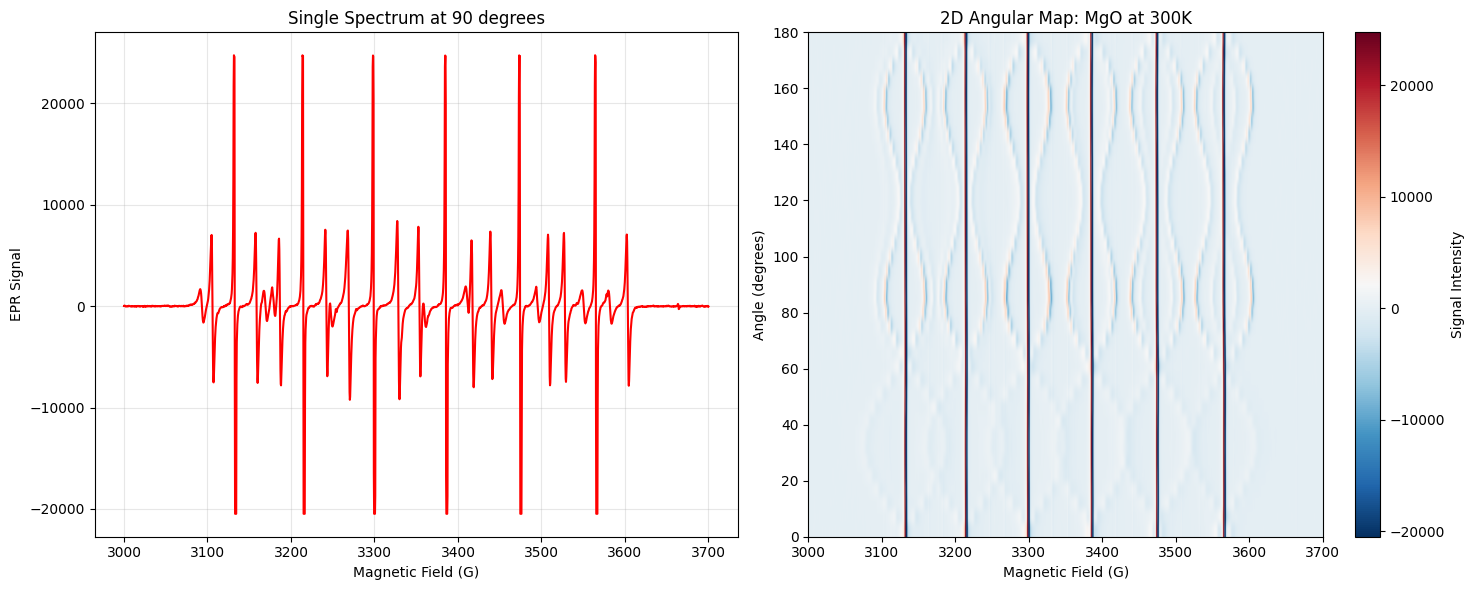

In [4]:
# Plot 2D angular data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot single spectrum at middle angle
middle_idx = y_2d.shape[0] // 2
ax1.plot(x_2d[0], y_2d[middle_idx], 'r-', linewidth=1.5)
ax1.set_xlabel('Magnetic Field (G)')
ax1.set_ylabel('EPR Signal')
ax1.set_title(f'Single Spectrum at {x_2d[1][middle_idx]:.0f} degrees')
ax1.grid(True, alpha=0.3)

# Plot 2D map
im = ax2.imshow(y_2d, aspect='auto', origin='lower', cmap='RdBu_r',
                extent=[x_2d[0].min(), x_2d[0].max(), x_2d[1].min(), x_2d[1].max()])
ax2.set_xlabel('Magnetic Field (G)')
ax2.set_ylabel('Angle (degrees)')
ax2.set_title('2D Angular Map: MgO at 300K')
plt.colorbar(im, ax=ax2, label='Signal Intensity')

plt.tight_layout()
plt.show()

## Loading 2D Pulse EPR Data

Load 2D pulse EPR data (Rabi oscillations).

File: Rabi2D_GdCaWO4_13dB_3057G.DSC
Data shape: (500, 1024)
Total data points: 512000
Parameters extracted: 182


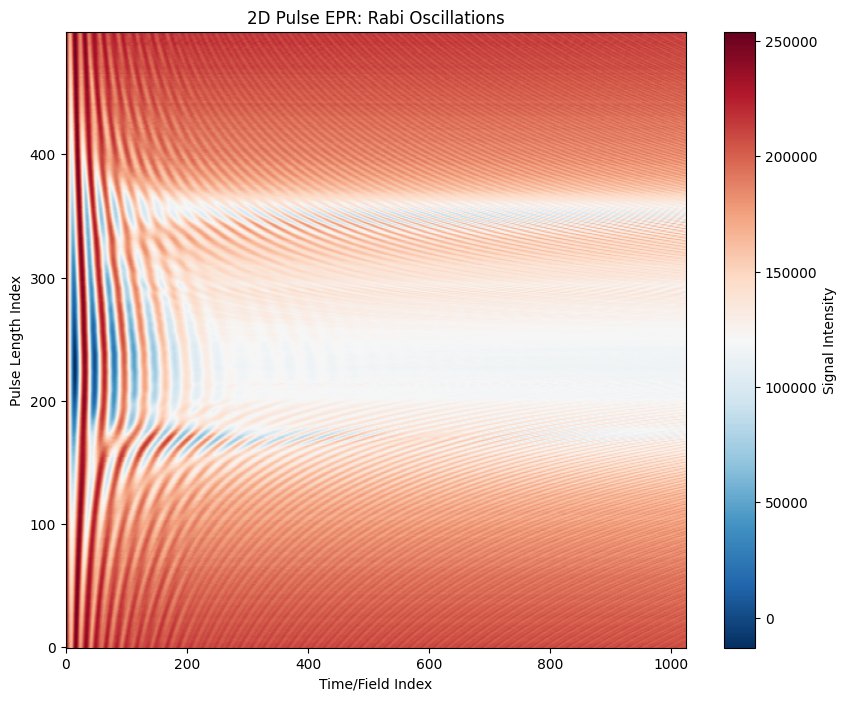

In [6]:
# Load 2D pulse EPR data
file_rabi = data_dir / 'Rabi2D_GdCaWO4_13dB_3057G.DSC'

x_rabi, y_rabi, params_rabi, filepath_rabi = epyr.eprload(str(file_rabi), plot_if_possible=False)

print(f"File: {file_rabi.name}")
print(f"Data shape: {y_rabi.shape}")
print(f"Total data points: {y_rabi.size}")
print(f"Parameters extracted: {len(params_rabi)}")

# Plot 2D Rabi data
plt.figure(figsize=(10, 8))
im = plt.imshow(y_rabi.real, aspect='auto', origin='lower', cmap='RdBu_r')
plt.xlabel('Time/Field Index')
plt.ylabel('Pulse Length Index')
plt.title('2D Pulse EPR: Rabi Oscillations')
plt.colorbar(im, label='Signal Intensity')
plt.show()

## Parameter Information

The eprload function extracts experimental parameters from the data files.

In [7]:
# Display key parameters from 1D data
print("1D Data Parameters (CaWO4:Er):")
key_params_1d = ['MWFQ', 'RCAG', 'XPTS', 'XMIN', 'XWID']
for param in key_params_1d:
    if param in params_1d:
        value = params_1d[param]
        if param == 'MWFQ':
            print(f"  {param}: {value/1e9:.4f} GHz")
        elif param == 'RCAG':
            print(f"  {param}: {value} dB")
        else:
            print(f"  {param}: {value}")

print(f"\n2D Pulse Data Parameters (Rabi):")
key_params_rabi = ['YPTS', 'YMIN', 'YWID']
for param in key_params_rabi:
    if param in params_rabi:
        print(f"  {param}: {params_rabi[param]}")

1D Data Parameters (CaWO4:Er):
  MWFQ: 9.7042 GHz
  RCAG: 60 dB
  XPTS: 1024
  XMIN: 100.0
  XWID: 6000.0

2D Pulse Data Parameters (Rabi):
  YPTS: 500
  YMIN: 0.0
  YWID: 499.0


## Data Formats Supported

The eprload function supports multiple Bruker EPR file formats:

- **BES3T format**: .DSC (descriptor) + .DTA (data) files
- **ESP/WinEPR format**: .par (parameters) + .spc (data) files

The function automatically detects the format and loads the appropriate data structure:
- **1D data**: Returns x-axis array and y-axis array
- **2D data**: Returns x-axis list and 2D y-axis array

All experimental parameters are extracted and returned in a dictionary.

In [8]:
# Summary of loaded data
print("Summary of loaded EPR data:")
print(f"1D spectrum: {len(y_1d)} points")
print(f"2D angular data: {y_2d.shape[0]} angles × {y_2d.shape[1]} field points")
print(f"2D pulse data: {y_rabi.shape[0]} × {y_rabi.shape[1]} matrix")
print(f"\nTotal parameters extracted: {len(params_1d) + len(params_2d) + len(params_rabi)}")

Summary of loaded EPR data:
1D spectrum: 1024 points
2D angular data: 37 angles × 2048 field points
2D pulse data: 500 × 1024 matrix

Total parameters extracted: 324
